# **CMPE 257 ML Final Project**



In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import zipfile
import timeit
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.utils import shuffle
from skimage import filters
from skimage.color import rgb2gray
from scipy.linalg import svd
drive.mount('/content/drive/',force_remount=True)
!ls "/content/drive/My Drive"


Mounted at /content/drive/
 1100-words-you-need-to-know_0764138642.pdf
 20140620_181357.jpg
 20190219_00001.pdf
 20190219-00001.pdf
'2019_Ahmet Bindal FundamentalsOfComputerArchitec.pdf'
 732613_Initial_Release_Letter.pdf
 AMAZON_FASHION.csv
 cat.jpg
'Cleartrip Flight E-Ticket.pdf'
 CMPE257_HW1_Monalisha_Parida.ipynb
'Colab Notebooks'
'Copy of 1. Lines and Angles - Magoosh GRE (1).webm'
'Copy of 1. Lines and Angles - Magoosh GRE.webm'
 CV_Monalisha_Parida.doc
'ETS GRE Verbal.pdf'
'GRE Big Book.pdf'
'Hadoop resume.docx'
 IMG-7162.JPG
'magoosh video'
'marriage certificate 2018-06-15.pdf'
 mastering-apache-spark.pdf
 MonaCV.pdf
 Mona.jpeg
'Monalisha Parida-Hadoop Developer_new.doc'
 Random_Images
 Raw_Data_64.npy
 Resume_monalishaParida.pdf
 SAM_1933.JPG
 soc-sign-bitcoinotc.csv.gz
 Superman
 Team4.doc
 Test_Data
 The-Official-Guide-to-the-GRE®️-Quantitative-Reasoning-Practice-Questions-Vol-One.pdf
 The-Official-Guide-to-the-GRE®️-Verbal-Reasoning-Practice-Questions-Vol-One.pdf
 train
'Un

# **Custom Function to calculate the features (HOG, Sobel) from the Image**

In [13]:
class Simpel_Preprocessor:
  def __init__ (self,width,height,inter=cv2.INTER_AREA):
    self.width=width
    self.height=height
    self.inter=inter

  def preprocess(self,image):
    return cv2.resize(image,(self.width,self.height),interpolation=self.inter)
    
class Simple_Dataset_Loader():
  def __init__(self,preprocessors=None):
    self.preprocessors = preprocessors
    if self.preprocessors is None:
      self.preprocessors=[]
  def load(self,imagePaths,Verbose=-1):
    data=[]
    labels=[]
    i=0
    for root, dirs, files in os.walk(imagePaths):
        print(os.path.basename(root))
        my_key = os.path.basename(root)
        for file_ in files:
            full_file_path = os.path.join(root, file_)
            i+=1
            #print(full_file_path)
            img = cv2.imread(full_file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            for p in self.preprocessors:
              img=p.preprocess(img)
            img=img/255
            data.append(img)
            labels.append(my_key)
            if Verbose>0 and i>0 and (i+1)%Verbose==0:
               print("[INFO] Processed {}/{}".format(i+1,len(imagePaths)))
      #labels.append(label)
    return (np.array(data),np.array(labels))
  def feture_extractor(self,Data):
    All_Feature_Matrix=[]
    Sobel_Feature=[]
    HoG_Feature=[]
    for i in range (len(Data)):
        Img=Data[i]
        Img_Flat=Img.reshape(1,4096)
        fd, hog_image = hog(Img, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=True, multichannel=False)
        Hog_Flat=hog_image.reshape(4096)
        HoG_Feature.append(Hog_Flat)
        sobel=filters.sobel(rgb2gray(Img))
        Sobel_Flat=sobel.reshape(4096)
        Sobel_Feature.append(Sobel_Flat)
        d=np.concatenate((Img_Flat,fd,Sobel_Flat), axis=None)
        All_Feature_Matrix.append(d)
    return All_Feature_Matrix,Sobel_Feature,HoG_Feature
  def PCA_F (self,Data):
    U, s, V = svd(Data)
    PCA_Feature= U[:, :1000] @ np.diag(s[:1000]) @ V[:1000,:]
    return PCA_Feature

(128, 128)

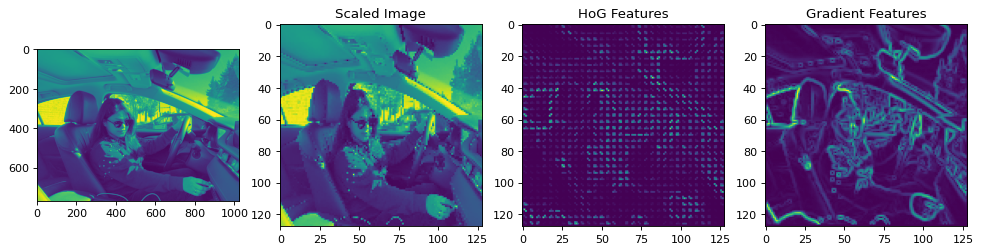

In [22]:
path='/content/drive/My Drive/Mona.jpeg'
Img=cv2.imread(path)
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
Img1=cv2.resize(Img,(300,300),interpolation=cv2.INTER_NEAREST)
plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,4,1)
plt.imshow(Img)
plt.subplot(1,4,2)
plt.imshow(Img1/255)
plt.title('Scaled Image')
fd, hog_image = hog(Img1, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=True, multichannel=False)
plt.subplot(1,4,3)
plt.imshow(hog_image)
plt.title('HoG Features')
sobel=filters.sobel(rgb2gray(Img1))
plt.subplot(1,4,4)
plt.imshow(sobel)
plt.title('Gradient Features')
sobel.shape

# **Loading & Preprocessing the dataset**

In [3]:
sp=Simpel_Preprocessor(64,64)
sdl=Simple_Dataset_Loader(preprocessors=[sp])
path='/content/drive/My Drive/train'
(data,labels)=sdl.load(path,Verbose=500)

train
c7
[INFO] Processed 500/29
[INFO] Processed 1000/29
[INFO] Processed 1500/29
[INFO] Processed 2000/29
c2
[INFO] Processed 2500/29
[INFO] Processed 3000/29
[INFO] Processed 3500/29
[INFO] Processed 4000/29
c8
[INFO] Processed 4500/29
[INFO] Processed 5000/29
[INFO] Processed 5500/29
[INFO] Processed 6000/29
c9
[INFO] Processed 6500/29
[INFO] Processed 7000/29
[INFO] Processed 7500/29
[INFO] Processed 8000/29
c4
[INFO] Processed 8500/29
[INFO] Processed 9000/29
[INFO] Processed 9500/29
[INFO] Processed 10000/29
[INFO] Processed 10500/29
c6
[INFO] Processed 11000/29
[INFO] Processed 11500/29
[INFO] Processed 12000/29
[INFO] Processed 12500/29
[INFO] Processed 13000/29
c0
[INFO] Processed 13500/29
[INFO] Processed 14000/29
[INFO] Processed 14500/29
[INFO] Processed 15000/29
[INFO] Processed 15500/29
c5
[INFO] Processed 16000/29
[INFO] Processed 16500/29
[INFO] Processed 17000/29
[INFO] Processed 17500/29
c1
[INFO] Processed 18000/29
[INFO] Processed 18500/29
[INFO] Processed 19000/29

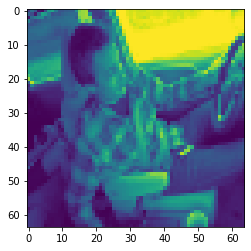

In [70]:
#np.save('/content/drive/My Drive/',data)
data1=np.load('/content/drive/My Drive/Raw_Data_64.npy')
data1=data1.reshape((data1.shape[0],4096))
plt.imshow(data1[0].reshape(64,64))

In [56]:
# 295 Manually Labeled Test Images
sp=Simpel_Preprocessor(64,64)
sdl=Simple_Dataset_Loader(preprocessors=[sp])
path='/content/drive/My Drive/Test_Data'
(Manual_Test_data,Manual_Test_labels)=sdl.load(path,Verbose=500)
All_Feature_Matrix_test,Sobel_Feature_test,HoG_Feature_test = sdl.feture_extractor(Manual_Test_data)

Test_Data
c5
c6
c8
c0
c7
c4
c9
c1
c3
c2


**Extracting All the Features**

In [60]:
sdl=Simple_Dataset_Loader(preprocessors=[sp])
All_Feature_Matrix,Sobel_Feature,HoG_Feature = sdl.feture_extractor(data1)
All_Feature_Matrix=np.array(All_Feature_Matrix)
HoG_Feature=np.array(HoG_Feature)
All_Feature_Matrix=np.array(All_Feature_Matrix)
Sobel_Feature=np.array(Sobel_Feature)
HoG_Feature.shape
Sobel_Feature=Sobel_Feature.reshape((Sobel_Feature.shape[0],1024))
Sobel_Feture.shape
Sobel_Feature_test =np.array(Sobel_Feature_test)

In [26]:
All_Feature_Matrix.shape

(22428, 10496)

In [52]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.PuBu):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
    #print(cm)
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(data1)
x_pca = pd.DataFrame(x_pca)
x_p

# **k-NN Classifier**

[INFO] feature matrix took: 717.7MB
[INFO] Evaluating k-NN Classifier....
[INFO] Time to train in sec  27.971492549000686
[INFO] Time to predict in sec  57.40667701299935
                              precision    recall  f1-score   support

                safe driving       0.98      0.99      0.99       247
             texting - right       1.00      1.00      1.00       222
talking on the phone - right       1.00      1.00      1.00       270
              texting - left       1.00      0.99      0.99       236
 talking on the phone - left       0.99      1.00      0.99       222
         operating the radio       1.00      0.99      0.99       217
                    drinking       1.00      1.00      1.00       228
             reaching behind       1.00      0.99      0.99       180
             hair and makeup       1.00      0.97      0.98       196
        talking to passenger       0.97      1.00      0.99       225

                    accuracy                           0.

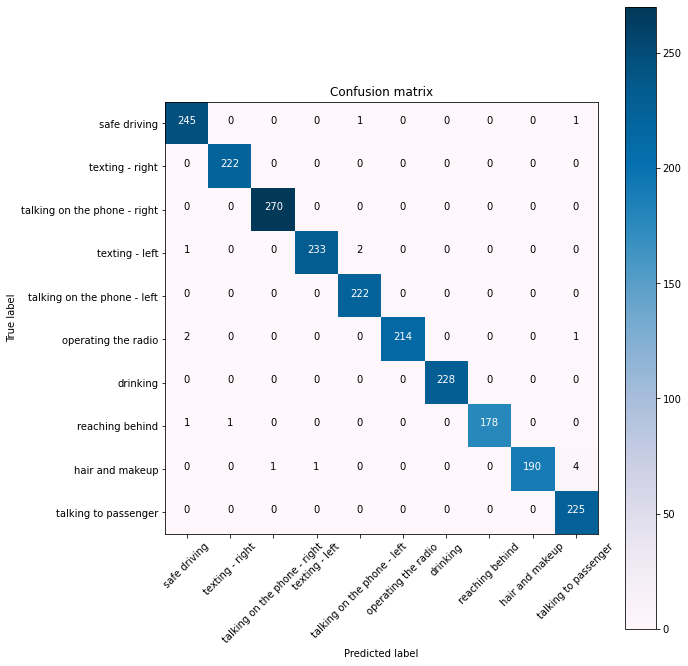

In [54]:
#k-NN Classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import cross_val_score
print("[INFO] feature matrix took: {:.1f}MB".format(data1.nbytes/(1024*1000.0)))
le=LabelEncoder()
labels=le.fit_transform(labels)
data1=data1.reshape((data1.shape[0],4096))
(trainX,testX,trainY,testY)=train_test_split(data1,labels,test_size=0.1,random_state=42)
print("[INFO] Evaluating k-NN Classifier....")
model=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
#cv_scores = cross_val_score(model, trainX, trainY, cv=20)
start = timeit.default_timer()
model.fit(trainX,trainY)
stop = timeit.default_timer()
print("[INFO] Time to train in sec " ,stop - start)
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
start = timeit.default_timer()
pred_Y=model.predict(testX)
stop = timeit.default_timer()
print("[INFO] Time to predict in sec " ,stop - start)
print(classification_report(testY,pred_Y,target_names = Class_Name))
cnf_matrix = confusion_matrix(testY,pred_Y)
np.set_printoptions(precision=4)
plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

In [ ]:
cv_scores

array([0.98910891, 0.99207921, 0.98712871, 0.99207921, 0.99405941,
       0.99009901, 0.99207921, 0.99108911, 0.99207921, 0.99306931,
       0.99207921, 0.9950495 , 0.99405941, 0.99306931, 0.99207921,
       0.98910891, 0.98811881, 0.99009901, 0.99207921, 0.98415842])

[INFO] Predicting for Manually labeled Test dataset using k-NN Classifier....
[INFO] Time to predict in sec  26.373809191001783
                              precision    recall  f1-score   support

                safe driving       0.38      0.32      0.34        38
             texting - right       0.35      0.33      0.34        36
talking on the phone - right       0.34      0.35      0.35        37
              texting - left       0.36      0.56      0.43        27
 talking on the phone - left       0.41      0.49      0.45        35
         operating the radio       0.95      0.62      0.75        32
                    drinking       0.25      0.13      0.17        31
             reaching behind       0.48      0.46      0.47        35
             hair and makeup       0.04      0.17      0.06         6
        talking to passenger       0.17      0.11      0.13        18

                    accuracy                           0.38       295
                   macro avg  

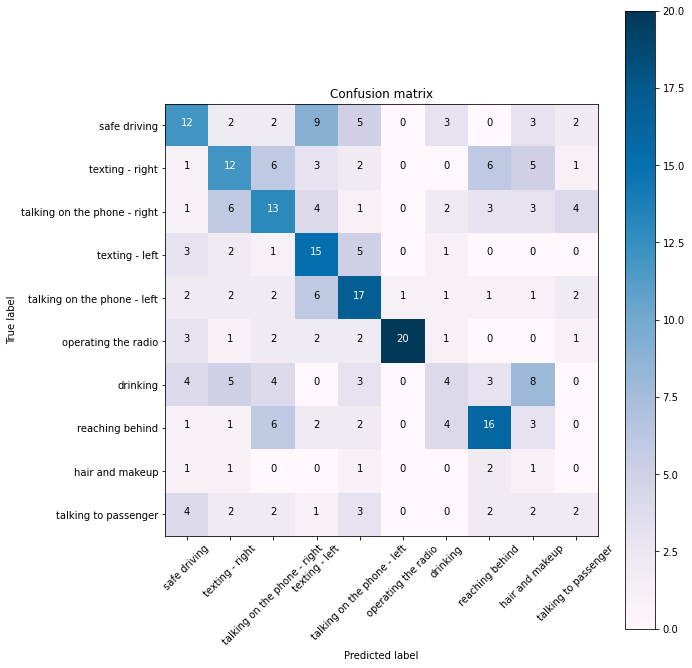

In [57]:
# Evaluating KNN on Manual Classified Data
#k-NN Classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import cross_val_score
print("[INFO] feature matrix took: {:.1f}MB".format(data1.nbytes/(1024*1000.0)))
le=LabelEncoder()
labels=le.fit_transform(labels)
(trainX,testX,trainY,testY)=train_test_split(data1,labels,test_size=0.1,random_state=42)
print("[INFO] Evaluating k-NN Classifier....")
model=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
#cv_scores = cross_val_score(model, trainX, trainY, cv=20)
start = timeit.default_timer()
model.fit(trainX,trainY)
stop = timeit.default_timer()
print("[INFO] Time to train in sec " ,stop - start)
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
start = timeit.default_timer()
pred_Y=model.predict(testX)
stop = timeit.default_timer()
print("[INFO] Time to predict in sec " ,stop - start)
print(classification_report(testY,pred_Y,target_names = Class_Name))
cnf_matrix = confusion_matrix(testY,pred_Y)
np.set_printoptions(precision=4)
plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

# **k-NN with Sobel & HOG Features**

[INFO] feature matrix took: 1839.1MB
[INFO] Evaluating k-NN Classifier....
[INFO] Time to train in sec  55.91014200799691
[INFO] Time to predict in sec  79.6977495799947
                              precision    recall  f1-score   support

                safe driving       0.38      0.34      0.36        38
             texting - right       0.39      0.39      0.39        36
talking on the phone - right       0.38      0.46      0.41        37
              texting - left       0.36      0.52      0.42        27
 talking on the phone - left       0.47      0.51      0.49        35
         operating the radio       0.92      0.72      0.81        32
                    drinking       0.38      0.16      0.23        31
             reaching behind       0.64      0.46      0.53        35
             hair and makeup       0.04      0.17      0.06         6
        talking to passenger       0.25      0.17      0.20        18

                    accuracy                           0.4

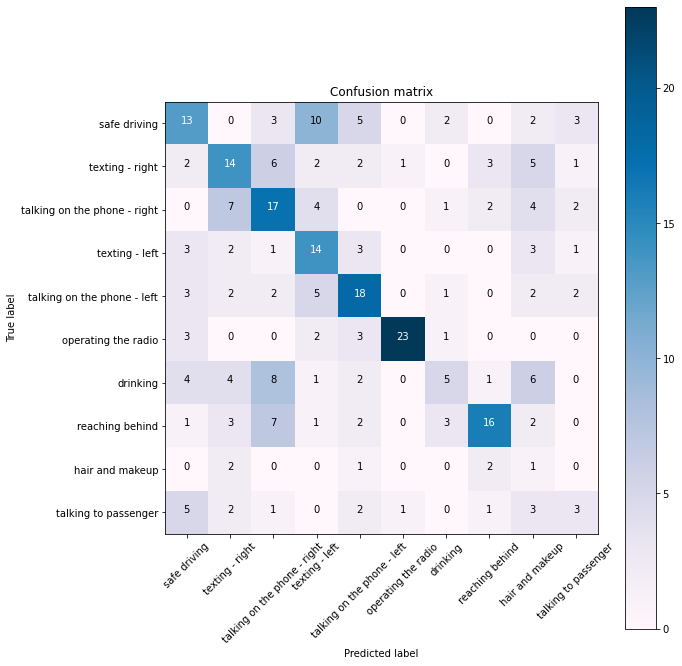

In [97]:
#k-NN Classifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import cross_val_score
print("[INFO] feature matrix took: {:.1f}MB".format(All_Feature_Matrix.nbytes/(1024*1000.0)))
le=LabelEncoder()
labels=le.fit_transform(labels)
(trainX,testX,trainY,testY)=train_test_split(All_Feature_Matrix,labels,test_size=0.1,random_state=42)
print("[INFO] Evaluating k-NN Classifier....")
model=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
#cv_scores = cross_val_score(model, trainX, trainY, cv=20)
start = timeit.default_timer()
model.fit(trainX,trainY)
stop = timeit.default_timer()
print("[INFO] Time to train in sec " ,stop - start)
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
start = timeit.default_timer()
pred_Y=model.predict(All_Feature_Matrix_test)
stop = timeit.default_timer()
print("[INFO] Time to predict in sec " ,stop - start)
print(classification_report(Manual_labels,pred_Y,target_names = Class_Name))
cnf_matrix = confusion_matrix(Manual_labels,pred_Y)
np.set_printoptions(precision=4)
plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

# **Support Vector Machine**

**Linear Kernel**

[INFO] Time to train  531.5558890130014
[INFO] Time to predict  543.5147638040035
Performance of Linear Kernel SVM on Manualy Labeled Test Data


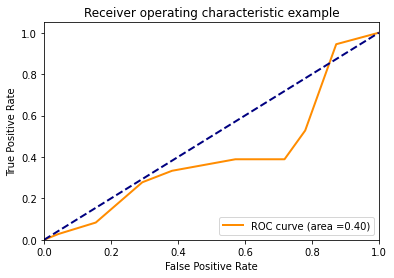

                              precision    recall  f1-score   support

                safe driving       0.46      0.42      0.44        38
             texting - right       0.38      0.42      0.40        36
talking on the phone - right       0.52      0.30      0.38        37
              texting - left       0.53      0.33      0.41        27
 talking on the phone - left       0.57      0.34      0.43        35
         operating the radio       0.51      0.81      0.63        32
                    drinking       0.56      0.45      0.50        31
             reaching behind       0.40      0.49      0.44        35
             hair and makeup       0.10      0.50      0.16         6
        talking to passenger       0.08      0.06      0.07        18

                    accuracy                           0.42       295
                   macro avg       0.41      0.41      0.38       295
                weighted avg       0.46      0.42      0.42       295

Confusion matrix


<Figure size 432x288 with 0 Axes>

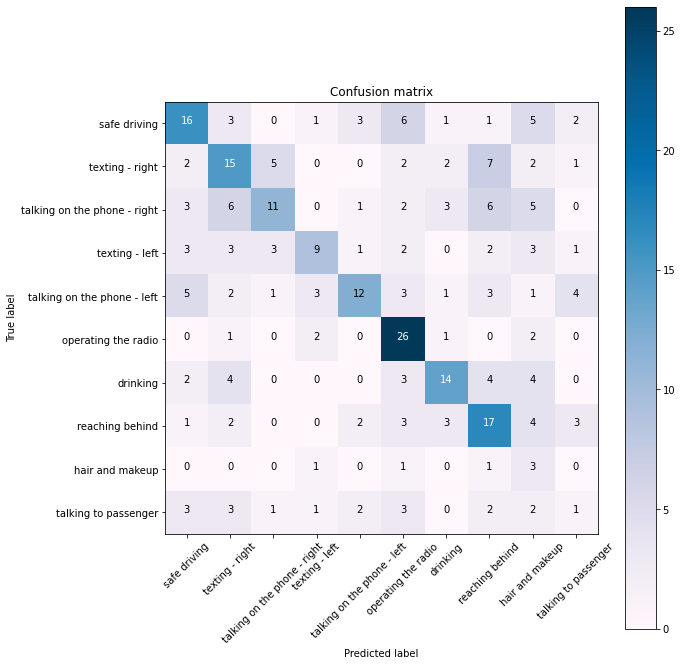

In [80]:
# SVM Classifier with different kernels
from sklearn.metrics import confusion_matrix
from sklearn import svm
start = timeit.default_timer()
(trainX,testX,trainY,testY)=train_test_split(data1,labels,test_size=0.1,random_state=42)
linear=svm.SVC(kernel='rbf',C=10,decision_function_shape='ovo').fit(trainX,trainY)
stop = timeit.default_timer()
print("[INFO] Time to train " ,stop - start)
linear_pred=linear.predict(Manual_data)
stop = timeit.default_timer()
print("[INFO] Time to predict " ,stop - start)
cnf_matrix = confusion_matrix(Manual_labels,linear_pred)
print('Performance of Linear Kernel SVM on Manualy Labeled Test Data')
plot_roc(Manual_labels,linear_pred)
print(classification_report(Manual_labels,linear_pred,target_names = Class_Name))
plt.figure()
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

In [71]:
# SVM Classifier with different kernels
from sklearn.metrics import confusion_matrix
from sklearn import svm
start = timeit.default_timer()
(trainX,testX,trainY,testY)=train_test_split(data1,labels,test_size=0.1,random_state=42)
rbf=svm.SVC(kernel='rbf',C=10,decision_function_shape='ovo').fit(trainX,trainY)
stop = timeit.default_timer()
print("[INFO] Time to train " ,stop - start)
start = timeit.default_timer()
rbf_pred=rbf.predict(Manual_data)
stop = timeit.default_timer()
print("[INFO] Time to predict " ,stop - start)
cnf_matrix = confusion_matrix(Manual_labels,rbf_pred)

[INFO] Time to train  554.8966679020014
[INFO] Time to predict  12.413946213997406


In [69]:
data1.shape

(22428, 64, 64)

Performance of Linear SVM on Manualy Labeled Test Data


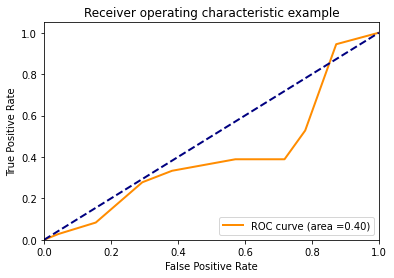

                              precision    recall  f1-score   support

                safe driving       0.46      0.42      0.44        38
             texting - right       0.38      0.42      0.40        36
talking on the phone - right       0.52      0.30      0.38        37
              texting - left       0.53      0.33      0.41        27
 talking on the phone - left       0.57      0.34      0.43        35
         operating the radio       0.51      0.81      0.63        32
                    drinking       0.56      0.45      0.50        31
             reaching behind       0.40      0.49      0.44        35
             hair and makeup       0.10      0.50      0.16         6
        talking to passenger       0.08      0.06      0.07        18

                    accuracy                           0.42       295
                   macro avg       0.41      0.41      0.38       295
                weighted avg       0.46      0.42      0.42       295

Confusion matrix


<Figure size 432x288 with 0 Axes>

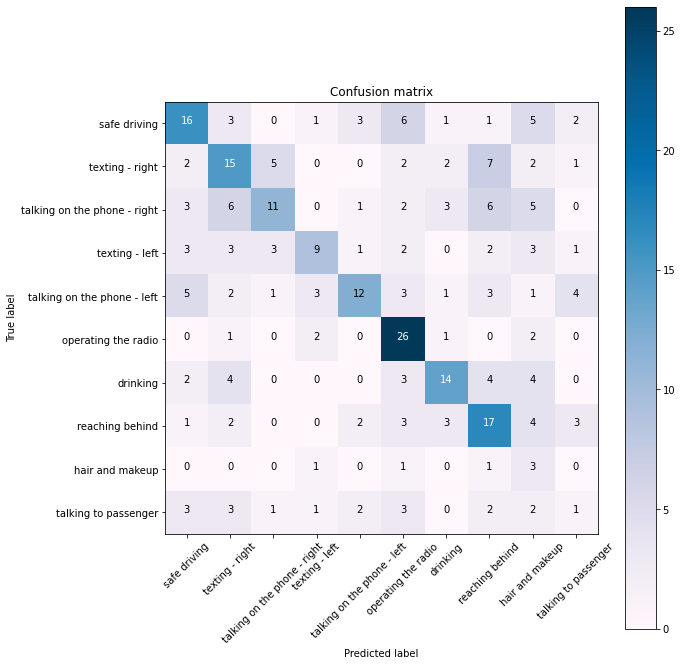

In [73]:
from sklearn import metrics
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area ={0:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
print('Performance of Linear SVM on Manualy Labeled Test Data')
plot_roc(Manual_labels,rbf_pred)
print(classification_report(Manual_labels,rbf_pred,target_names = Class_Name))
plt.figure()
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

**Rbf Kernel**

In [ ]:
# SVM Classifier with different kernels
from sklearn.metrics import confusion_matrix
from sklearn import svm
start = timeit.default_timer()
poly=svm.SVC(kernel='poly',C=10,decision_function_shape='ovo').fit(trainX,trainY)
start = timeit.default_timer()
poly_pred=poly.predict(Manual_data)
stop = timeit.default_timer()
print("[INFO] Time to predict " ,stop - start)

Performance of Polynomial Kernel SVM on Manualy Labeled Test Data


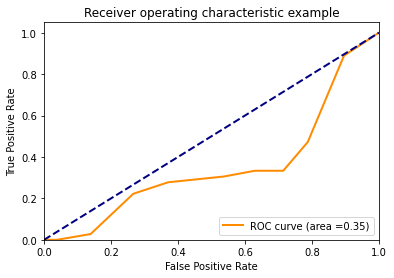

                              precision    recall  f1-score   support

                safe driving       0.32      0.26      0.29        38
             texting - right       0.35      0.42      0.38        36
talking on the phone - right       0.50      0.32      0.39        37
              texting - left       0.45      0.37      0.41        27
 talking on the phone - left       0.52      0.37      0.43        35
         operating the radio       0.50      0.69      0.58        32
                    drinking       0.41      0.39      0.40        31
             reaching behind       0.40      0.46      0.43        35
             hair and makeup       0.11      0.50      0.18         6
        talking to passenger       0.10      0.06      0.07        18

                    accuracy                           0.39       295
                   macro avg       0.37      0.38      0.36       295
                weighted avg       0.40      0.39      0.39       295

Confusion matrix


<Figure size 432x288 with 0 Axes>

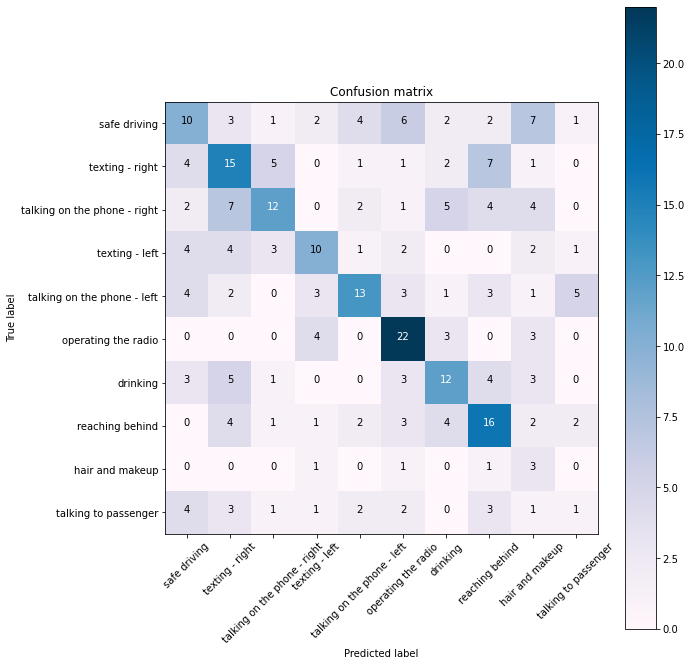

In [78]:
poly_pred=poly.predict(Manual_data)
cnf_matrix = confusion_matrix(Manual_labels,poly_pred)
print('Performance of Polynomial Kernel SVM on Manualy Labeled Test Data')
plot_roc(Manual_labels,poly_pred)
print(classification_report(Manual_labels,poly_pred,target_names = Class_Name))
plt.figure()
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

# **Multi Layer Perceptron (MLP)**

In [81]:
class NeuralNetwork:
  def __init__(self,layers,alpha=0.1):
    self.W=[]
    self.layers=layers
    # Layers: List of integers [2,2,1]
    self.alpha=alpha
    for i in np.arange(0,len(layers)-2):
      w=np.random.randn(layers[i]+1,layers[i+1]+1)
      self.W.append(w/np.sqrt(layers[i]))
    w=np.random.randn(layers[-2]+1,layers[-1])
    self.W.append(w/np.sqrt(layers[-2]))
  def __repr__(self):
    return "NeuralNetwork:{}".format("-".join(str(l) for l in self.layers))
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  def sigmoid_deriv(self,x):
    return x*(1-x)
  def fit(self,X,Y,epochs=1000,displayUpdate=100):
    LOSS=[]
    X=np.c_[X,np.ones((X.shape[0]))]
    for epoch in np.arange(0,epochs):
      for (x,target) in zip(X,Y):
        self.fit_partial(x,target)
      if epoch == 0 or (epoch+1)%displayUpdate==0:
        loss=self.calculate_loss(X,Y)
        print("[INFO] epoch={}, Loss={:.7f}".format(epoch+1,loss))
      LOSS.append(loss)
    return LOSS
  def fit_partial(self,x,y):
    A=[np.atleast_2d(x)]
    #Feedforward
    for layer in np.arange(0,len(self.W)):
      net=A[layer].dot(self.W[layer])
      out=self.sigmoid(net)
      A.append(out)
    error=A[-1]-y
    D=[error*self.sigmoid_deriv(A[-1])]
    #Backword Propagation
    for layer in np.arange(len(A)-2,0,-1):
      delta=D[-1].dot(self.W[layer].T)
      delta=delta*self.sigmoid_deriv(A[layer])
      D.append(delta)
    D=D[::-1]
    for layer in np.arange(0,len(self.W)):
      self.W[layer]+=-self.alpha*A[layer].T.dot(D[layer])
  def predict(self,X,addBias=True):
    p=np.atleast_2d(X)
    if addBias:
      p=np.c_[p,np.ones((p.shape[0]))]
    for layer in np.arange(0,len(self.W)):
      p=self.sigmoid(np.dot(p,self.W[layer]))
    return p
  def calculate_loss(self,X,targets):
    targets=np.atleast_2d(targets)
    predictions=self.predict(X,addBias=False)
    loss=0.5*np.sum((predictions-targets)**2)
    return loss

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
data2=data1.reshape((data1.shape[0],4096))
data2=(data2-data2.min())/(data2.max()-data2.min())
Manual_data=Manual_Test_data.reshape((Manual_Test_data.shape[0],4096))
Manual_data=(Manual_data-Manual_data.min())/(Manual_data.max()-Manual_data.min())
(trn_X, tst_X,trn_Y,tst_Y)=train_test_split(data2,labels,test_size=0.25)
trn_Y=LabelBinarizer().fit_transform(trn_Y)
tst_Y=LabelBinarizer().fit_transform(tst_Y)
print("[INFO] Trainning the NN....")
#nn=NeuralNetwork([trn_X.shape[1],560,256,10])
#Loss=nn.fit(trn_X,trn_Y,epochs=100)

(22428, 4096)


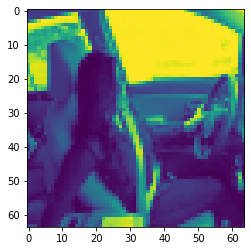

In [88]:
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
import argparse
lb=LabelBinarizer()
trn_Y=lb.fit_transform(trn_Y)
tst_Y=lb.fit_transform(tst_Y)
Manual_Test_labels=lb.fit_transform(Manual_Test_labels)
print(data2.shape)
Img=data2[7].reshape(64,64)
plt.imshow(Img)


In [89]:
#define the 784 X 256 X 128 X 10
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
import argparse
model=Sequential()
model.add(Dense(1024,input_shape=(4096,),activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
print("[INFO] trainning the network...")
sgd=SGD(0.01)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])
start = timeit.default_timer()
H=model.fit(trn_X,trn_Y,validation_data=(tst_X,tst_Y),epochs=100,batch_size=32)
stop = timeit.default_timer()
print("[INFO] Time to train " ,stop - start)

[INFO] trainning the network...
Epoch 1/100
526/526 [==============================] - 12s 24ms/step - loss: 1.8025 - accuracy: 0.3929 - val_loss: 1.3427 - val_accuracy: 0.5408
Epoch 2/100
526/526 [==============================] - 12s 24ms/step - loss: 1.0777 - accuracy: 0.6554 - val_loss: 1.2026 - val_accuracy: 0.5584
Epoch 3/100
526/526 [==============================] - 13s 24ms/step - loss: 0.6625 - accuracy: 0.8020 - val_loss: 0.4685 - val_accuracy: 0.8687
Epoch 4/100
526/526 [==============================] - 13s 24ms/step - loss: 0.4144 - accuracy: 0.8863 - val_loss: 0.3396 - val_accuracy: 0.9007
Epoch 5/100
526/526 [==============================] - 13s 24ms/step - loss: 0.2846 - accuracy: 0.9251 - val_loss: 0.3445 - val_accuracy: 0.8969
Epoch 6/100
526/526 [==============================] - 12s 24ms/step - loss: 0.2049 - accuracy: 0.9473 - val_loss: 0.2397 - val_accuracy: 0.9272
Epoch 7/100
526/526 [==============================] - 12s 23ms/step - loss: 0.1460 - accuracy: 0.

In [90]:
Manual_Test_data=np.array(Manual_Test_data)
Manual_Test_data.shape
trn_X.shape

(16821, 4096)

[INFO] Time to predict  1.5889635380008258
                              precision    recall  f1-score   support

                safe driving       1.00      1.00      1.00       624
             texting - right       1.00      1.00      1.00       579
talking on the phone - right       0.99      0.99      0.99       598
              texting - left       1.00      1.00      1.00       590
 talking on the phone - left       1.00      1.00      1.00       600
         operating the radio       1.00      1.00      1.00       555
                    drinking       1.00      0.99      0.99       591
             reaching behind       0.99      1.00      1.00       513
             hair and makeup       0.99      0.99      0.99       478
        talking to passenger       0.99      0.99      0.99       479

                   micro avg       1.00      0.99      1.00      5607
                   macro avg       1.00      0.99      1.00      5607
                weighted avg       1.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


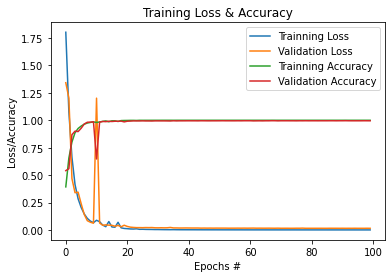

In [93]:
plt.figure()
plt.plot(np.arange(0,100),H.history["loss"],label="Trainning Loss")
plt.plot(np.arange(0,100),H.history["val_loss"],label="Validation Loss")
plt.plot(np.arange(0,100),H.history["accuracy"],label="Trainning Accuracy")
plt.plot(np.arange(0,100),H.history["val_accuracy"],label="Validation Accuracy")
plt.title("Training Loss & Accuracy")
plt.xlabel("Epochs #")
plt.ylabel("Loss/Accuracy")
plt.legend()
start = timeit.default_timer()
pred_Y=model.predict(tst_X,batch_size=32)
stop = timeit.default_timer()
for i in range (len(tst_X)):
  for j in range (10):
    if pred_Y[i,j]>0.5:
       pred_Y[i,j]=1
    else:
       pred_Y[i,j]=0
print("[INFO] Time to predict " ,stop - start)
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
print(classification_report(tst_Y,pred_Y,target_names = Class_Name))
#cnf_matrix = confusion_matrix(Manual_Test_labels,pred_Y)
#plt.figure()
#np.set_printoptions(precision=2)
#plot_confusion_matrix(cnf_matrix, classes=Class_Name,title='Confusion matrix')

In [94]:
model2=Sequential()
model2.add(Dense(1024,input_shape=(4096,),activation="relu"))
model2.add(Dense(512,activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(10,activation="softmax"))
print("[INFO] trainning the network...")
sgd=SGD(0.01)
model2.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])
start = timeit.default_timer()
H2=model2.fit(trn_X,trn_Y,validation_data=(Manual_data,Manual_Test_labels),epochs=100,batch_size=32)
stop = timeit.default_timer()
print("[INFO] Time to train " ,stop - start)

[INFO] trainning the network...
Epoch 1/100
526/526 [==============================] - 12s 22ms/step - loss: 1.7796 - accuracy: 0.3933 - val_loss: 2.3656 - val_accuracy: 0.1797
Epoch 2/100
526/526 [==============================] - 11s 21ms/step - loss: 1.0715 - accuracy: 0.6604 - val_loss: 2.2475 - val_accuracy: 0.3492
Epoch 3/100
526/526 [==============================] - 11s 22ms/step - loss: 0.6547 - accuracy: 0.8071 - val_loss: 2.2193 - val_accuracy: 0.3966
Epoch 4/100
526/526 [==============================] - 11s 22ms/step - loss: 0.4271 - accuracy: 0.8799 - val_loss: 2.9348 - val_accuracy: 0.3797
Epoch 5/100
526/526 [==============================] - 11s 22ms/step - loss: 0.2718 - accuracy: 0.9261 - val_loss: 2.8265 - val_accuracy: 0.3186
Epoch 6/100
526/526 [==============================] - 11s 22ms/step - loss: 0.1781 - accuracy: 0.9547 - val_loss: 3.2383 - val_accuracy: 0.3288
Epoch 7/100
526/526 [==============================] - 11s 22ms/step - loss: 0.1348 - accuracy: 0.

In [95]:
# Testing on Manually Labeled images
start = timeit.default_timer()
pred_Y=model2.predict(Manual_data,batch_size=32)
stop = timeit.default_timer()
print("[INFO] Time to predict " ,stop - start)
Class_Name = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left', 'operating the radio', 'drinking', 'reaching behind', 
               'hair and makeup', 'talking to passenger']
for i in range (295):
  for j in range (10):
    if pred_Y[i,j]>0.2:
       pred_Y[i,j]=1
    else:
       pred_Y[i,j]=0
pred_Y
print(classification_report(Manual_Test_labels,pred_Y,target_names = Class_Name))



[INFO] Time to predict  0.16038379499514122
                              precision    recall  f1-score   support

                safe driving       0.35      0.32      0.33        38
             texting - right       0.38      0.39      0.38        36
talking on the phone - right       0.52      0.32      0.40        37
              texting - left       0.37      0.37      0.37        27
 talking on the phone - left       0.52      0.37      0.43        35
         operating the radio       0.44      0.59      0.51        32
                    drinking       0.56      0.48      0.52        31
             reaching behind       0.33      0.57      0.42        35
             hair and makeup       0.06      0.50      0.11         6
        talking to passenger       0.21      0.33      0.26        18

                   micro avg       0.35      0.42      0.38       295
                   macro avg       0.37      0.43      0.37       295
                weighted avg       0.41     